PROBLEM STATEMENT 1

Problem 1

Analysts are required to explore data and reflect on the insights. Clear writing skill is an integral part of a good report. Note that the explanations must be such that readers with minimum knowledge of analytics is able to grasp the insight.

Austo Motor Company is a leading car manufacturer specializing in SUV, Sedan, and Hatchback models. In its recent board meeting, concerns were raised by the members on the efficiency of the marketing campaign currently being used. The board decides to rope in an analytics professional to improve the existing campaign.

You as an analyst have been tasked with performing a thorough analysis of the data and coming up with insights to improve the marketing campaign.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
Data=pd.read_csv('C:/Users/anamk/Downloads/austo_automobile+(2)+(1).csv')

A. What is the important technical information about the dataset that a database administrator would be interested in? (Hint: Information about the size of the dataset and the nature of the variables)

In [3]:
Data.shape

(1581, 14)

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.0+ KB


In [5]:
Data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,1581.0,NaN,NaN,NaN,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
Gender,1528,4,Male,1199,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Profession,1581,2,Salaried,896,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Marital_status,1581,2,Married,1443,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,1581,2,Post Graduate,985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No_of_Dependents,1581.0,NaN,NaN,NaN,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Personal_loan,1581,2,Yes,792,NaN,NaN,NaN,NaN,NaN,NaN,NaN
House_loan,1581,2,No,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Partner_working,1581,2,Yes,868,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,1581.0,NaN,NaN,NaN,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0


B. Take a critical look at the data and do a preliminary analysis of the variables. Do a quality check of the data so that the variables are consistent. Are there any discrepancies present in the data?

In [6]:
Data.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [7]:
dups = Data.duplicated()


In [8]:
dups.sum()

0

In [9]:
Data.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


In [10]:
Data['Age'].unique()
Data['Profession'].unique()
Data['Marital_status'].unique()
Data['Education'].unique()
Data['Gender'].unique()

array(['Male', 'Femal', 'Female', nan, 'Femle'], dtype=object)

In [11]:
Data.nunique()

Age                  33
Gender                4
Profession            2
Marital_status        2
Education             2
No_of_Dependents      5
Personal_loan         2
House_loan            2
Partner_working       2
Salary              538
Partner_salary      149
Total_salary        754
Price                53
Make                  3
dtype: int64

C. Explore all the features of the data separately by using appropriate visualizations and draw insights that can be utilized by the business.

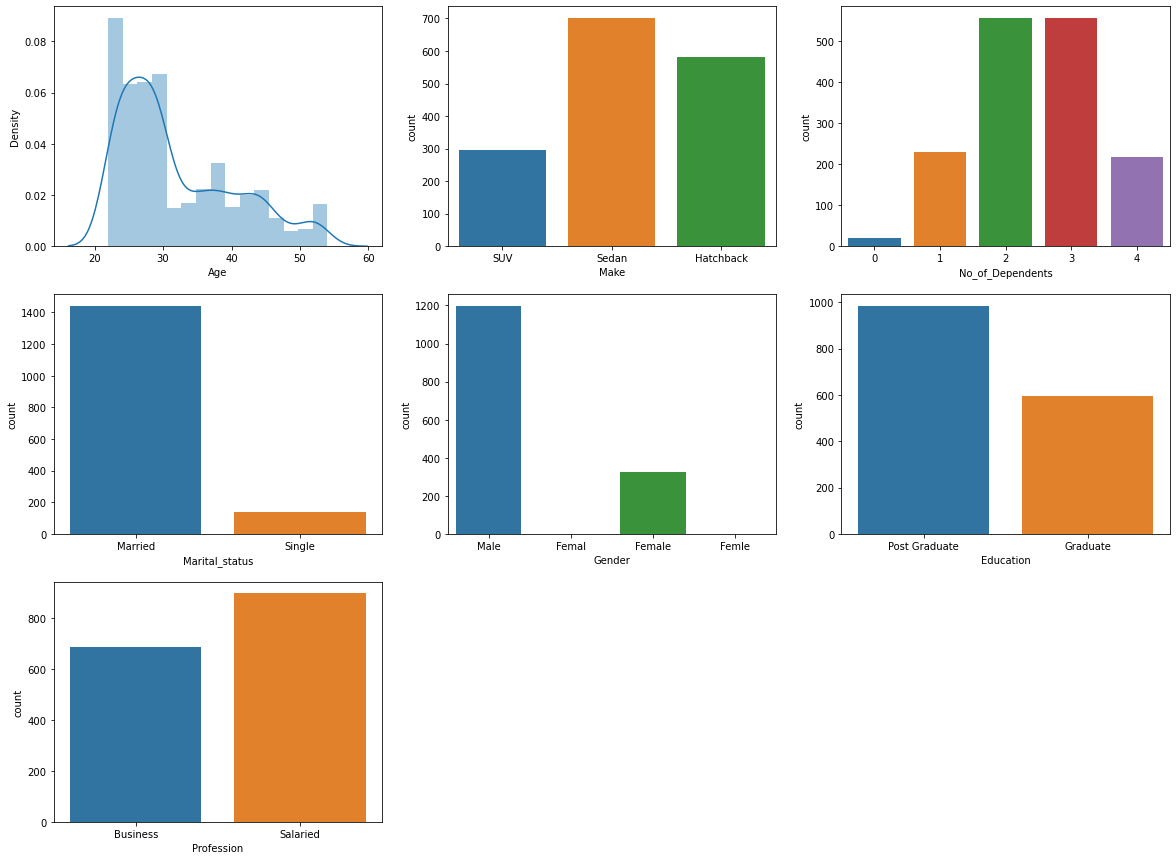

In [12]:
plt.figure(figsize=(20,15))
plt.subplot(331)
sns.distplot(Data['Age'],kde= True)
plt.subplot(332)
sns.countplot(Data['Make'])
plt.subplot(333)
sns.countplot(Data['No_of_Dependents'])
plt.subplot(334)
sns.countplot(Data['Marital_status'])
plt.subplot(335)
sns.countplot(Data['Gender'])
plt.subplot(336)
sns.countplot(Data['Education'])
plt.subplot(337)
sns.countplot(Data['Profession']);

In [13]:
Data['Gender'].replace('Femal','Female',inplace=True)

In [14]:
Data['Gender'].replace('Femle','Female',inplace=True)

In [15]:
Data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [16]:
Data['Gender'].mode()

0    Male
Name: Gender, dtype: object

In [17]:
Data.Gender.fillna('Male',inplace=True)

In [18]:
Data['Partner_salary'].fillna(Data['Partner_salary'].mean(),inplace=True)

In [19]:
Data.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

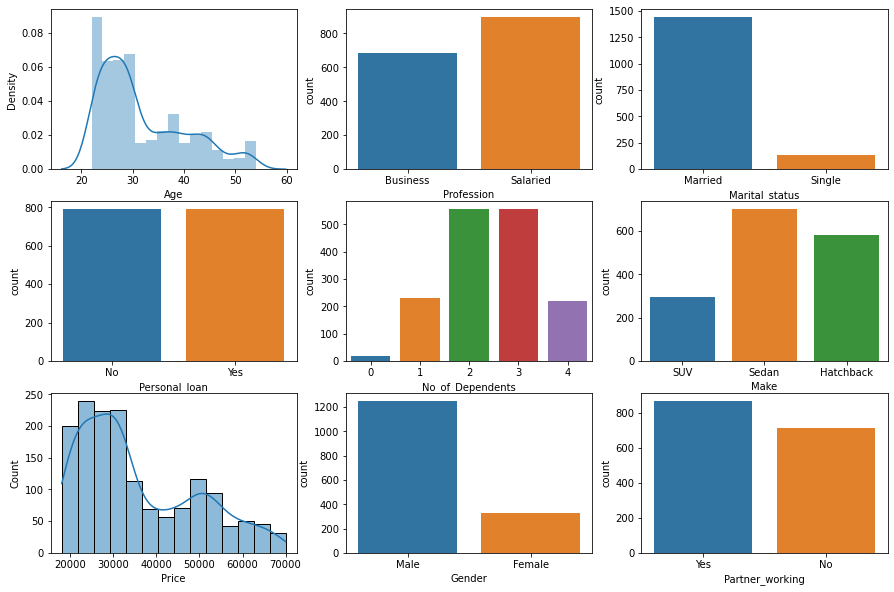

In [20]:
plt.figure(figsize=(15,10))
plt.subplot(331)
sns.distplot(Data['Age'],kde=True)
plt.subplot(332)
sns.countplot(Data['Profession'])
plt.subplot(333)
sns.countplot(Data['Marital_status'])
plt.subplot(334)
sns.countplot(Data['Personal_loan'])
plt.subplot(335)
sns.countplot(Data['No_of_Dependents'])
plt.subplot(336)
sns.countplot(Data['Make'])
plt.subplot(337)
sns.histplot(Data['Price'],kde=True)
plt.subplot(338)
sns.countplot(Data['Gender']);
plt.subplot(339)
sns.countplot(Data['Partner_working']);

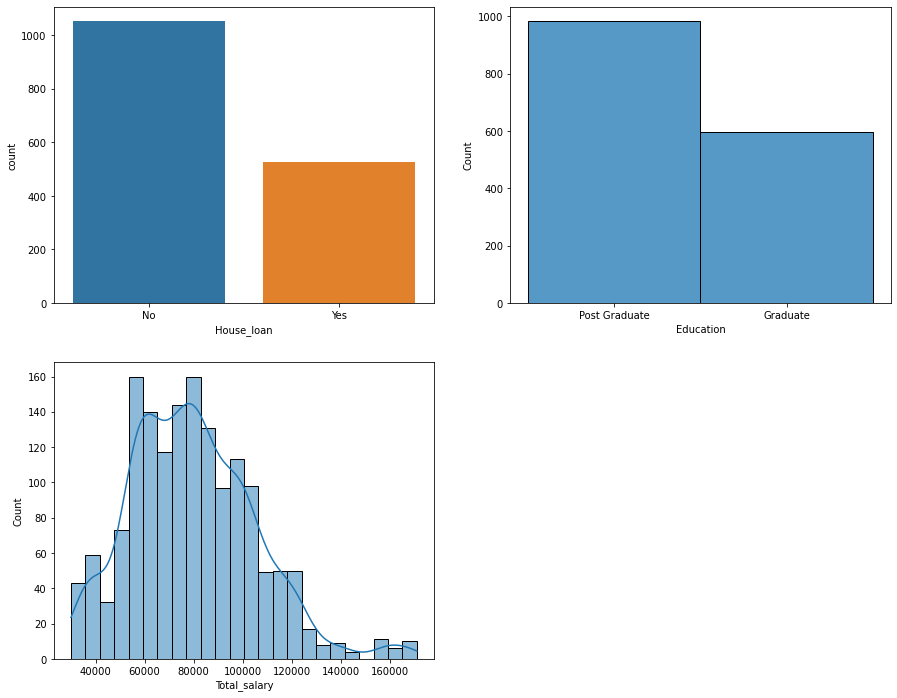

In [21]:
plt.figure(figsize=(15,12))
plt.subplot(221)
sns.countplot(Data['House_loan'])
plt.subplot(222)
sns.histplot(Data['Education']);
plt.subplot(223)
sns.histplot(Data['Total_salary'],kde=True);

D. Understanding the relationships among the variables in the dataset is crucial for every analytical project. Perform analysis on the data fields to gain deeper insights. Comment on your understanding of the data.

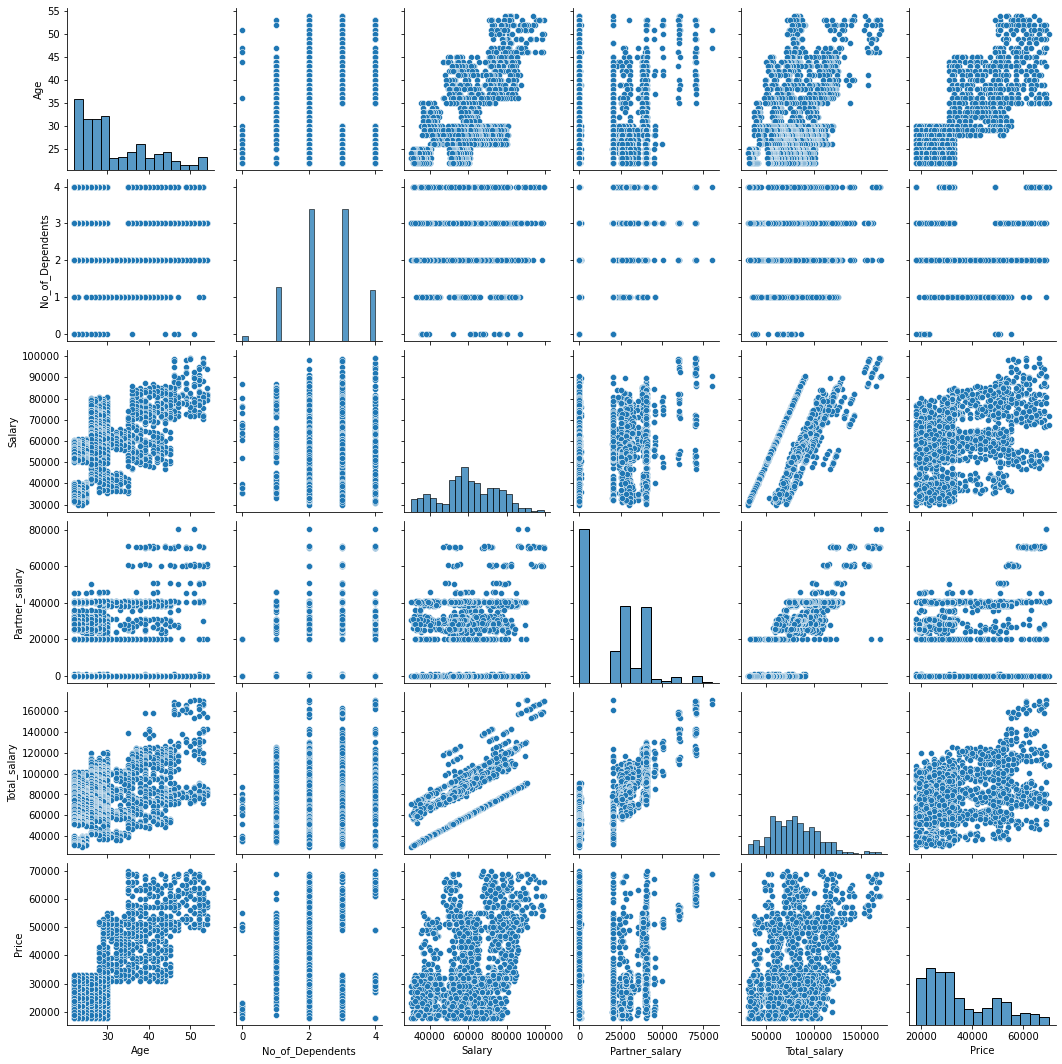

In [22]:
sns.pairplot(Data);

In [23]:
Data.groupby('Gender')['Make'].value_counts()


Gender  Make     
Female  SUV          173
        Sedan        141
        Hatchback     15
Male    Hatchback    567
        Sedan        561
        SUV          124
Name: Make, dtype: int64

In [24]:
Data.groupby(['Gender','Make'])['Price'].sum()

Gender  Make     
Female  Hatchback      412000
        SUV           9252000
        Sedan         6031000
Male    Hatchback    14996000
        SUV           7328000
        Sedan        18261000
Name: Price, dtype: int64

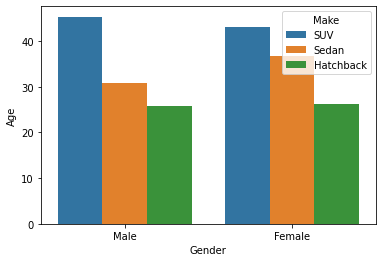

In [25]:
sns.barplot(Data['Gender'],Data['Age'],hue= Data['Make'],ci=None);


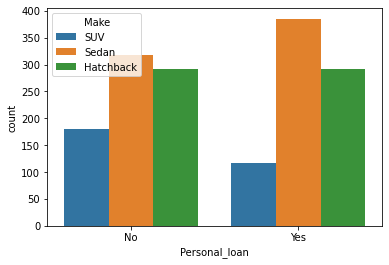

In [26]:
sns.countplot(Data['Personal_loan'],hue=Data['Make']);

In [27]:
pd.crosstab(Data['No_of_Dependents'],Data['Make'])

Make,Hatchback,SUV,Sedan
No_of_Dependents,,,
0,15,5,0
1,11,34,184
2,181,87,289
3,256,117,184
4,119,54,45


In [28]:
Data['Education-Profession']=Data['Education']+'-'+Data['Profession']

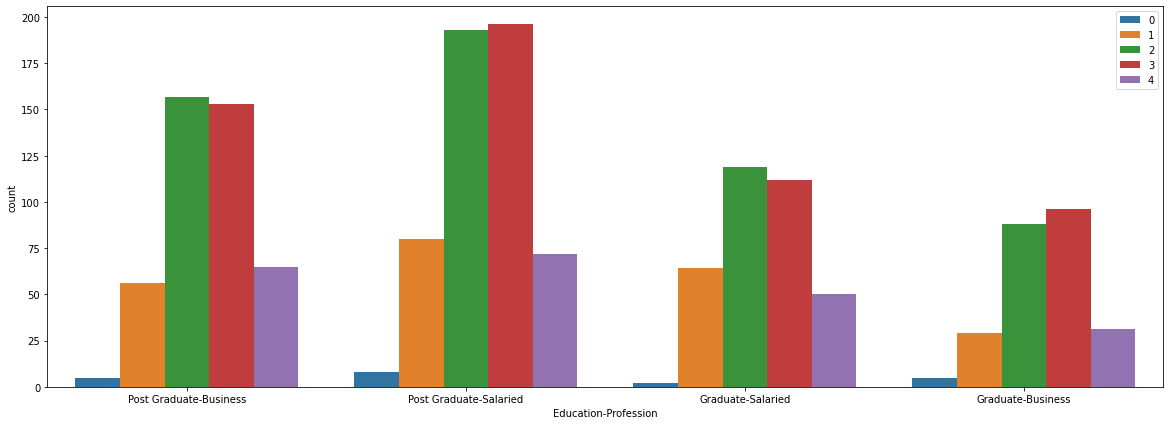

In [29]:
plt.figure(figsize=(20,7))
sns.countplot(Data['Education-Profession'],hue=Data['No_of_Dependents']);
plt.legend(loc='upper right')

In [30]:
pd.crosstab(Data['Make'],Data['Total_salary']>=50000)

Total_salary,False,True
Make,,
Hatchback,81,501
SUV,11,286
Sedan,51,651


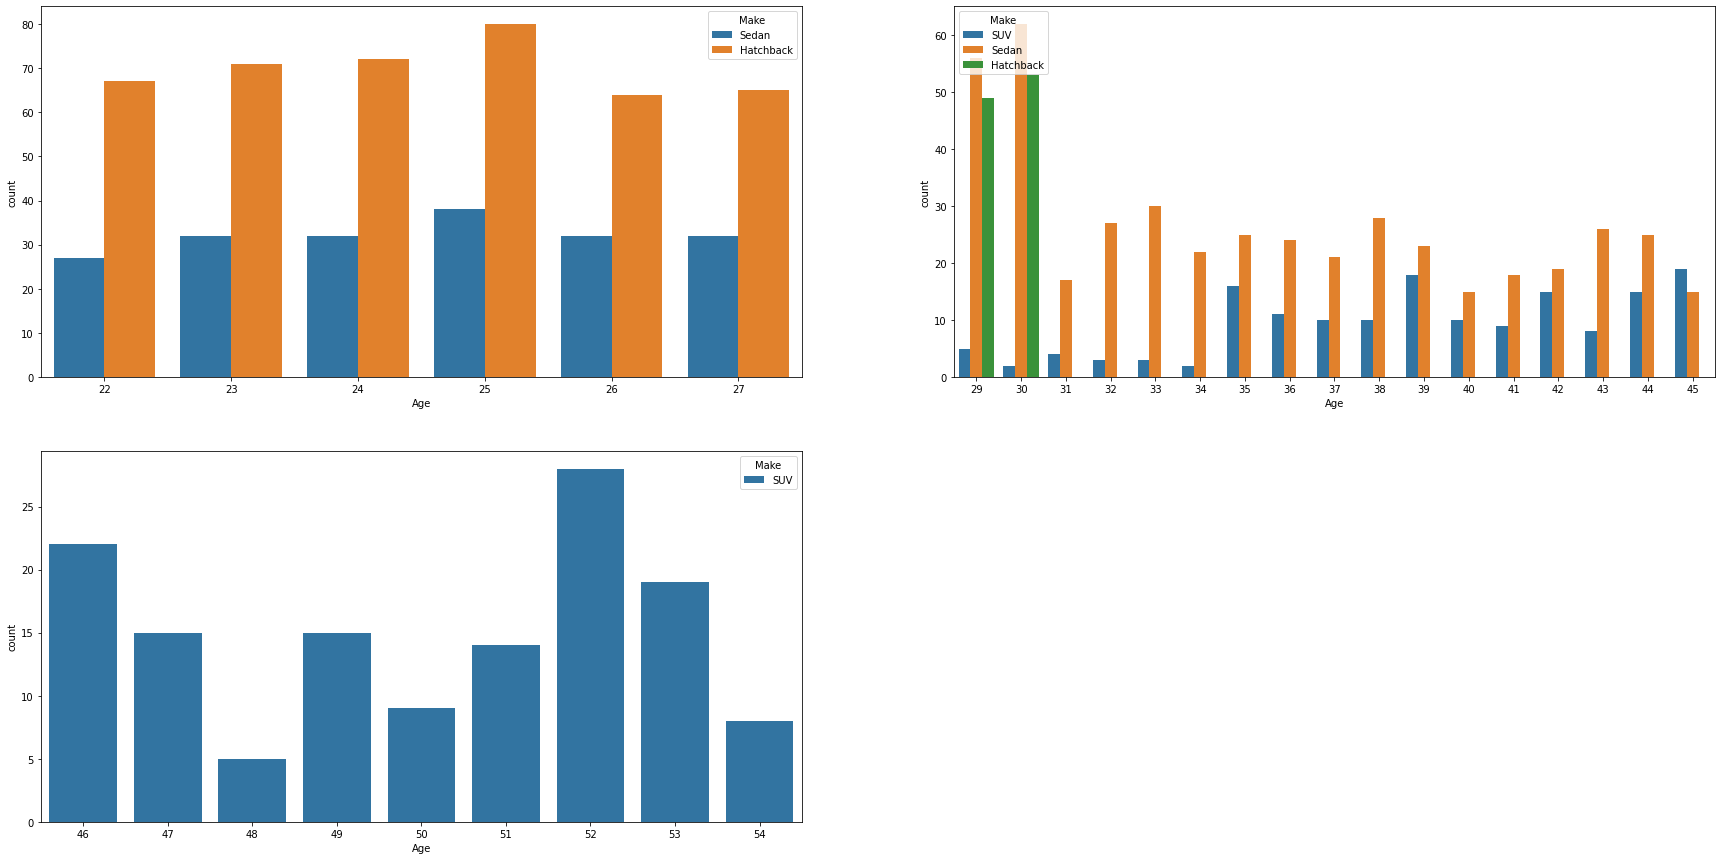

In [31]:
age35 = Data[Data['Age']<=27]
age3545 = Data[(Data['Age']>28)&(Data['Age']<=45)]
age45 =Data[Data['Age']>45]






plt.figure(figsize=(30,15))

plt.subplot(221)
sns.countplot(age35['Age'],hue=age35['Make'])
plt.subplot(222)
sns.countplot(age3545['Age'],hue=age3545['Make'])
plt.subplot(223)
sns.countplot(age45['Age'],hue=age45['Make']);

E. Employees working on the existing marketing campaign have made the following remarks. Based on the data and your analysis state whether you agree or disagree with their observations. Justify your answer Based on the data available.

E1) Steve Roger says “Men prefer SUV by a large margin, compared to the women”

E2) Ned Stark believes that a salaried person is more likely to buy a Sedan.

E3) Sheldon Cooper does not believe any of them; he claims that a salaried male is an easier target for a SUV sale over a Sedan Sale.

In [32]:
#E(1) 
pd.crosstab(Data['Make'],Data['Gender'])

Gender,Female,Male
Make,,
Hatchback,15,567
SUV,173,124
Sedan,141,561


In [33]:
#E(2)
pd.crosstab(Data['Make'],Data['Profession'])

Profession,Business,Salaried
Make,,
Hatchback,290,292
SUV,89,208
Sedan,306,396


In [34]:
#E(3)
Data.groupby(['Make','Profession'])['Gender'].value_counts()

Make       Profession  Gender
Hatchback  Business    Male      290
           Salaried    Male      277
                       Female     15
SUV        Business    Female     55
                       Male       34
           Salaried    Female    118
                       Male       90
Sedan      Business    Male      256
                       Female     50
           Salaried    Male      305
                       Female     91
Name: Gender, dtype: int64

F. From the given data, comment on the amount spent on purchasing automobiles across the following categories. Comment on how a Business can utilize the results from this exercise. Give justification along with presenting metrics/charts used for arriving at the conclusions.

Give justification along with presenting metrics/charts used for arriving at the conclusions.

F1) Gender

F2) Personal_loan

In [35]:
pd.crosstab(Data['Partner_working'],Data['Gender'])

Gender,Female,Male
Partner_working,,
No,151,562
Yes,178,690


In [36]:
Data_highprice=Data[Data['Price']>55000]
Data_highprice.head(10)

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make,Education-Profession
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV,Post Graduate-Business
1,53,Female,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV,Post Graduate-Salaried
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV,Post Graduate-Salaried
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV,Graduate-Salaried
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV,Post Graduate-Salaried
5,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,79800,60500.0,140300,57000,SUV,Post Graduate-Salaried
7,52,Male,Salaried,Married,Graduate,4,No,No,Yes,79100,40400.0,119500,68000,SUV,Graduate-Salaried
8,52,Male,Salaried,Married,Post Graduate,4,No,No,No,89400,0.0,89400,61000,SUV,Post Graduate-Salaried
9,52,Male,Salaried,Married,Post Graduate,3,No,No,No,83700,0.0,83700,57000,SUV,Post Graduate-Salaried
10,52,Male,Salaried,Married,Post Graduate,4,Yes,No,No,81600,0.0,81600,67000,SUV,Post Graduate-Salaried


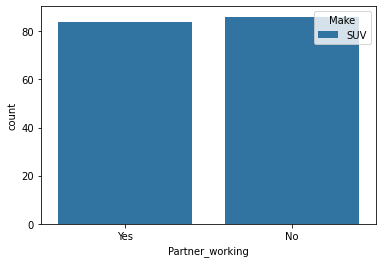

In [37]:
#G.
sns.countplot(Data_highprice['Partner_working'],hue=Data_highprice['Make']);

In [38]:
Data.groupby(['Gender'])['Price'].sum()

Gender
Female    15695000
Male      40585000
Name: Price, dtype: int64

In [39]:
Data.groupby(['Marital_status'])['Price'].sum()

Marital_status
Married    51660000
Single      4620000
Name: Price, dtype: int64

In [40]:
Data.groupby(['Make'])['Price'].sum()

Make
Hatchback    15408000
SUV          16580000
Sedan        24292000
Name: Price, dtype: int64

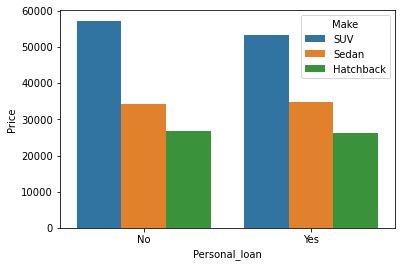

In [41]:
sns.barplot(Data['Personal_loan'],Data['Price'],hue=Data['Make'],ci=None);

H.The main objective of this analysis is to devise an improved marketing strategy to send targeted information to different groups of potential buyers present in the data. For the current analysis use the Gender and Marital status - fields to arrive at groups with similar purchase history.

In [42]:
Data['Gender_Marital_status']=Data['Gender']+'-'+Data['Marital_status']
Data['Gender_Marital_status'].unique()

array(['Male-Married', 'Female-Married', 'Male-Single', 'Female-Single'],
      dtype=object)

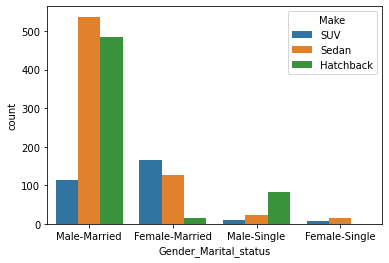

In [43]:
sns.countplot(Data['Gender_Marital_status'],hue=Data['Make']);

PROBLEM STATEMENT 2

In [44]:

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import os 

import warnings
warnings.filterwarnings("ignore")

In [45]:
Data1=pd.read_excel(r'C:/Users/anamk/Downloads/godigt_cc_data (1).xlsx')

In [46]:
Data1.shape

(8448, 28)

In [47]:
Data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   userid                   8448 non-null   int64         
 1   card_no                  8448 non-null   object        
 2   card_bin_no              8448 non-null   int64         
 3   Issuer                   8448 non-null   object        
 4   card_type                8448 non-null   object        
 5   card_source_date         8448 non-null   datetime64[ns]
 6   high_networth            8448 non-null   object        
 7   active_30                8448 non-null   int64         
 8   active_60                8448 non-null   int64         
 9   active_90                8448 non-null   int64         
 10  cc_active30              8448 non-null   int64         
 11  cc_active60              8448 non-null   int64         
 12  cc_active90              8448 non-

In [48]:
Data1.isnull().sum()

userid                      0
card_no                     0
card_bin_no                 0
Issuer                      0
card_type                   0
card_source_date            0
high_networth               0
active_30                   0
active_60                   0
active_90                   0
cc_active30                 0
cc_active60                 0
cc_active90                 0
hotlist_flag                0
widget_products             0
engagement_products         0
annual_income_at_source     0
other_bank_cc_holding       0
bank_vintage                0
T+1_month_activity          0
T+2_month_activity          0
T+3_month_activity          0
T+6_month_activity          0
T+12_month_activity         0
Transactor_revolver        38
avg_spends_l3m              0
Occupation_at_source        0
cc_limit                    0
dtype: int64

In [49]:
Data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8448 entries, 0 to 8447
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   userid                   8448 non-null   int64         
 1   card_no                  8448 non-null   object        
 2   card_bin_no              8448 non-null   int64         
 3   Issuer                   8448 non-null   object        
 4   card_type                8448 non-null   object        
 5   card_source_date         8448 non-null   datetime64[ns]
 6   high_networth            8448 non-null   object        
 7   active_30                8448 non-null   int64         
 8   active_60                8448 non-null   int64         
 9   active_90                8448 non-null   int64         
 10  cc_active30              8448 non-null   int64         
 11  cc_active60              8448 non-null   int64         
 12  cc_active90              8448 non-

In [50]:
cat=[]
num=[]
for i in Data1.columns:
    if Data1[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

['card_no', 'Issuer', 'card_type', 'high_networth', 'hotlist_flag', 'other_bank_cc_holding', 'Transactor_revolver', 'Occupation_at_source']
['userid', 'card_bin_no', 'card_source_date', 'active_30', 'active_60', 'active_90', 'cc_active30', 'cc_active60', 'cc_active90', 'widget_products', 'engagement_products', 'annual_income_at_source', 'bank_vintage', 'T+1_month_activity', 'T+2_month_activity', 'T+3_month_activity', 'T+6_month_activity', 'T+12_month_activity', 'avg_spends_l3m', 'cc_limit']


In [51]:
Data1[cat]

,card_no,Issuer,card_type,high_networth,hotlist_flag,other_bank_cc_holding,Transactor_revolver,Occupation_at_source
0,4384 39XX XXXX XXXX,Visa,edge,B,N,Y,T,Self Employed
1,4377 48XX XXXX XXXX,Visa,prosperity,A,N,Y,R,0
2,4377 48XX XXXX XXXX,Visa,rewards,C,N,N,R,Student
3,4258 06XX XXXX XXXX,Visa,indianoil,E,N,N,T,Self Employed
4,4377 48XX XXXX XXXX,Visa,edge,B,N,N,T,Salaried
...,...,...,...,...,...,...,...,...
8443,4262 41XX XXXX XXXX,Visa,chartered,A,N,N,T,0
8444,37691 6XXXX XXXXX,Amex,centurion,A,N,N,T,Salaried
8445,4375 51XX XXXX XXXX,Visa,rewards,D,N,Y,T,Retired
8446,4477 47XX XXXX XXXX,Visa,indianoil,C,N,N,T,Salaried


In [52]:
Data1['Issuer']=Data1['Issuer'].astype('category')
Data1['card_type']=Data1['card_type'].astype('category')
Data1['high_networth']=Data1['high_networth'].astype('category')
Data1['other_bank_cc_holding']=Data1['other_bank_cc_holding'].astype('category')
Data1['Occupation_at_source']=Data1['Occupation_at_source'].astype('category')

In [53]:
Data1['Issuer_cat']=Data1['Issuer'].cat.codes
Data1['Issuer_cat'].unique()

array([2, 1, 0], dtype=int8)

In [54]:
Data1['card_type_cat']=Data1['card_type'].cat.codes
Data1['card_type_cat'].unique()

array([ 4, 10, 12,  7,  1, 13,  3,  0,  6, 14,  9, 11,  8,  2,  5],
      dtype=int8)

In [55]:
Data1['high_networth_cat']=Data1['high_networth'].cat.codes
Data1['high_networth_cat'].unique()

array([1, 0, 2, 4, 3], dtype=int8)

In [56]:
Data1['other_bank_cc_holding_cat']=Data1['other_bank_cc_holding'].cat.codes
Data1['other_bank_cc_holding_cat'].unique()

array([1, 0], dtype=int8)

In [58]:
Data1.drop(['userid','card_no','card_bin_no','Issuer','card_type','card_source_date','high_networth'],axis=1,inplace=True)
Data1.head()

,active_30,active_60,active_90,cc_active30,cc_active60,cc_active90,hotlist_flag,widget_products,engagement_products,annual_income_at_source,...,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit,Issuer_cat,card_type_cat,high_networth_cat,other_bank_cc_holding_cat
0,0,1,1,0,0,0,N,1,3,1552111,...,0,0,T,27729,Self Employed,290000,2,4,1,1
1,1,1,1,0,0,0,N,4,1,4833871,...,0,0,R,280854,0,950000,2,10,0,1
2,0,0,0,0,0,0,N,4,2,1345429,...,0,0,R,70587,Student,210000,2,12,2,0
3,0,1,1,1,1,1,N,6,0,880560,...,0,0,T,9156,Self Employed,80000,2,7,4,0
4,1,1,1,0,1,1,N,4,3,1808582,...,0,0,T,38108,Salaried,220000,2,4,1,0


In [59]:
Data1.drop(['active_30','active_60','active_90','hotlist_flag','widget_products','engagement_products','T+1_month_activity','T+2_month_activity'],axis=1,inplace=True)


,cc_active30,cc_active60,cc_active90,annual_income_at_source,other_bank_cc_holding,bank_vintage,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit,Issuer_cat,card_type_cat,high_networth_cat,other_bank_cc_holding_cat


In [60]:
Data1.drop(['Transactor_revolver','Occupation_at_source'],axis=1,inplace=True)
Data1.head(0)

,cc_active30,cc_active60,cc_active90,annual_income_at_source,other_bank_cc_holding,bank_vintage,T+3_month_activity,T+6_month_activity,T+12_month_activity,avg_spends_l3m,cc_limit,Issuer_cat,card_type_cat,high_networth_cat,other_bank_cc_holding_cat


In [63]:
Data1.corr().round(2)

,cc_active30,cc_active60,cc_active90,annual_income_at_source,bank_vintage,T+3_month_activity,T+6_month_activity,T+12_month_activity,avg_spends_l3m,cc_limit,Issuer_cat,card_type_cat,high_networth_cat,other_bank_cc_holding_cat
cc_active30,1.00,0.65,0.48,0.02,0.02,0.04,0.15,0.16,0.01,0.01,0.01,-0.01,-0.02,-0.05
cc_active60,0.65,1.00,0.74,0.01,0.01,0.03,0.10,0.10,0.00,0.00,0.01,-0.01,-0.00,-0.05
cc_active90,0.48,0.74,1.00,-0.00,-0.00,0.02,0.07,0.07,-0.00,-0.01,0.00,-0.00,0.01,-0.03
annual_income_at_source,0.02,0.01,-0.00,1.00,-0.00,0.00,0.00,0.01,0.68,0.77,-0.01,-0.20,-0.84,-0.01
bank_vintage,0.02,0.01,-0.00,-0.00,1.00,0.02,-0.00,0.00,-0.00,-0.00,0.00,0.01,0.01,0.02
T+3_month_activity,0.04,0.03,0.02,0.00,0.02,1.00,0.09,0.09,-0.00,-0.01,0.01,0.01,0.00,0.02
T+6_month_activity,0.15,0.10,0.07,0.00,-0.00,0.09,1.00,0.30,0.00,-0.00,0.01,-0.01,-0.01,0.08
T+12_month_activity,0.16,0.10,0.07,0.01,0.00,0.09,0.30,1.00,0.01,0.00,0.01,-0.01,-0.00,0.09
avg_spends_l3m,0.01,0.00,-0.00,0.68,-0.00,-0.00,0.00,0.01,1.00,0.53,0.00,-0.14,-0.57,-0.01
cc_limit,0.01,0.00,-0.01,0.77,-0.00,-0.01,-0.00,0.00,0.53,1.00,0.00,-0.21,-0.81,-0.02


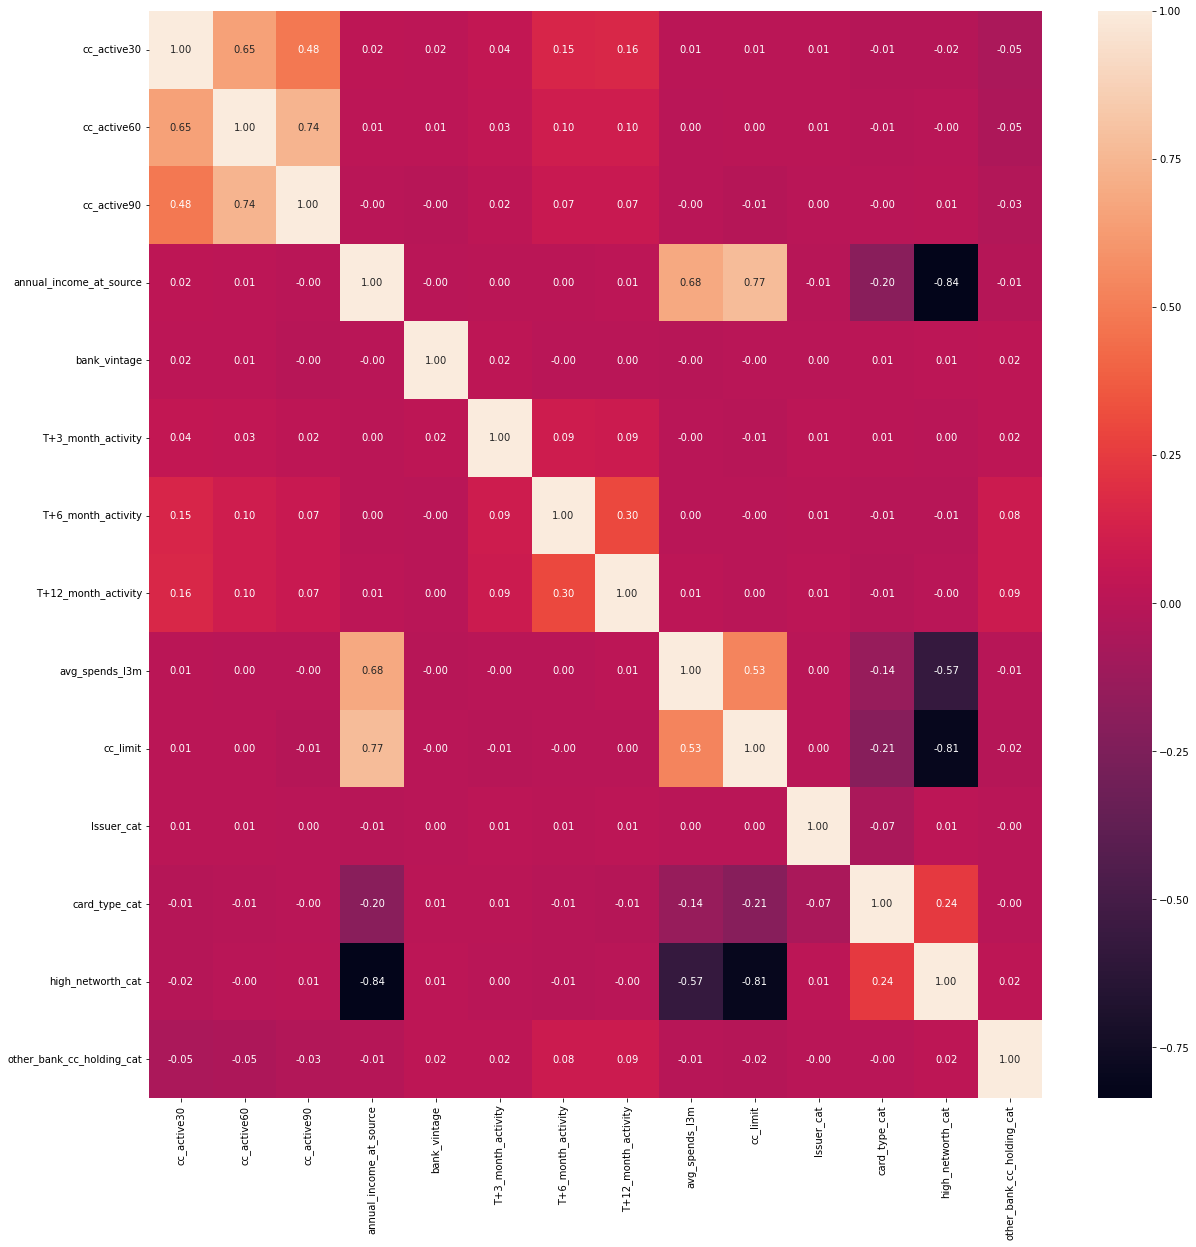

In [62]:
plt.figure(figsize=(20,20))
sns.heatmap(Data1.corr(),annot=True,fmt=".2f");